# Weight initialization

Based on lectures from Stanford's CS231n <a href="http://cs231n.stanford.edu/slides/2020/lecture_7.pdf">Training Neural Networks, Part 1</a>.

**Question:** *What happens when we start with inital weghts set to 0, i.e., `W = 0`?*

<img src="nn.png">

**Answer:** If every neuron in the network computes the same output, then they will also all compute the same gradients during backpropagation and undergo the same parameter updates. In other words, there is no source of asymmetry between neurons if their weights are initialized to be the same value. 

Therefore, one should initialize `W` with random weights to promote difference between neuron outputs. However, given a deep neural network, we learned that having really high weigts can lead to the *exploding gradient* problem and having really low weights can read to the *valishing gradient* problem. 

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def init_weight_plot(init_func, act_name):
    # assume some unit Guassian 10-D input data
    D = np.random.randn(1000, 500)
    hidden_layer_sizes = [500] * 10
    nonlinearities = [act_name] * len(hidden_layer_sizes)

    act = {'relu' : lambda x : np.maximum(0, x), 'tanh' : lambda x : np.tanh(x)}
    Hs = {}
    for i in range(len(hidden_layer_sizes)):
        X = D if i == 0 else Hs[i - 1] # input at this layer
        fan_in = X.shape[1]
        fan_out = hidden_layer_sizes[i]
        W = init_func(fan_in, fan_out)

        H = np.dot(X, W) # matrix multiply
        H = act[nonlinearities[i]](H) # nonlinearity
        Hs[i] = H

    # look at distributions at each layer
    print('input layer had mean %f and std %f' % (np.mean(D), np.std(D)))
    layer_means = [np.mean(H) for i, H in Hs.items()]
    layer_stds = [np.std(H) for i, H in Hs.items()]
    for i, H in Hs.items():
        print('hidden layer %d had mean %f and std %f' % (i + 1, layer_means[i], layer_stds[i]))

    # plot the means and standard devations
    plt.figure()
    plt.subplot(121)
    plt.plot(Hs.keys(), layer_means, 'ob-')
    plt.title('layer mean')
    plt.subplot(122)
    plt.plot(Hs.keys(), layer_stds, 'or-')
    plt.title('layer std')

    # plot the raw distributions
    fig, axes = plt.subplots(nrows = 1, ncols = 10, figsize=(15, 5))
    for i, ax in enumerate(axes.flat, start = 1):
        ax.hist(Hs[i - 1].ravel(), 30, range = (-1, 1))

    fig.tight_layout()
    plt.show()

input layer had mean -0.002149 and std 1.002265
hidden layer 1 had mean -0.017341 and std 0.384430
hidden layer 2 had mean -0.020916 and std 0.907731
hidden layer 3 had mean -0.020772 and std 0.990688
hidden layer 4 had mean -0.018532 and std 0.998860
hidden layer 5 had mean -0.019247 and std 0.999345
hidden layer 6 had mean -0.019986 and std 0.999786
hidden layer 7 had mean -0.020000 and std 0.999800
hidden layer 8 had mean -0.020000 and std 0.999800
hidden layer 9 had mean -0.020000 and std 0.999800
hidden layer 10 had mean -0.020000 and std 0.999800


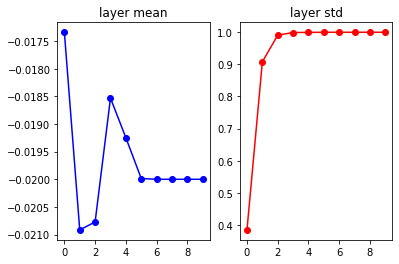

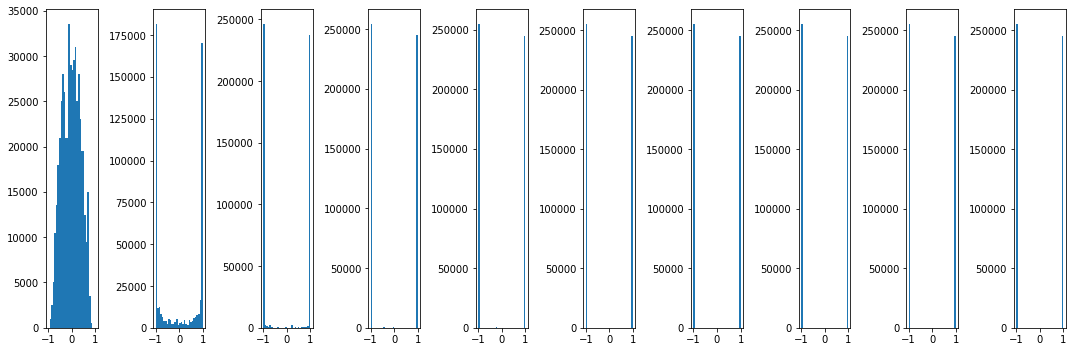

In [30]:
func = lambda x, y: np.ones((x, y)) * 0.02
init_weight_plot(func, 'tanh')

## Option 1: Initialize using small random weights

One common practice is to initialize the weights of the neurons to small numbers, which is also referred to as *breaking symmetry*. The idea is that the neurons will start as random and unique, and will thus compute distinct updates and integrate themeselves as diverse parts of the full network. A default choice is to use Gausian Normal values scaled by 1e-2.

$W = 0.01 * np.random.randn(n_{l-1},n_{l})$

where $n_{l-1}$ is the number of inputs and $n_{l}$ is the number of hidden units for the $l$-th layer.

<font color='maroon'>This tends to work well for small networks, but it is problematic still for deep networks, potentially leading to *valishing gradients* and dead nodes.</font>

Let's see an example. First, we will initialize with small random weights.

input layer had mean -0.001455 and std 0.998764
hidden layer 1 had mean -0.000312 and std 0.213029
hidden layer 2 had mean 0.000152 and std 0.047623
hidden layer 3 had mean -0.000025 and std 0.010623
hidden layer 4 had mean -0.000003 and std 0.002372
hidden layer 5 had mean 0.000000 and std 0.000531
hidden layer 6 had mean 0.000000 and std 0.000119
hidden layer 7 had mean 0.000000 and std 0.000027
hidden layer 8 had mean 0.000000 and std 0.000006
hidden layer 9 had mean 0.000000 and std 0.000001
hidden layer 10 had mean 0.000000 and std 0.000000


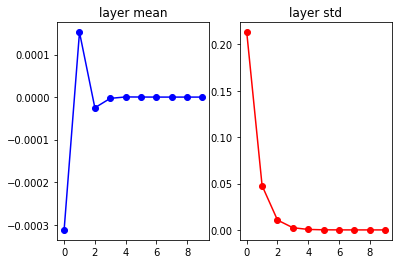

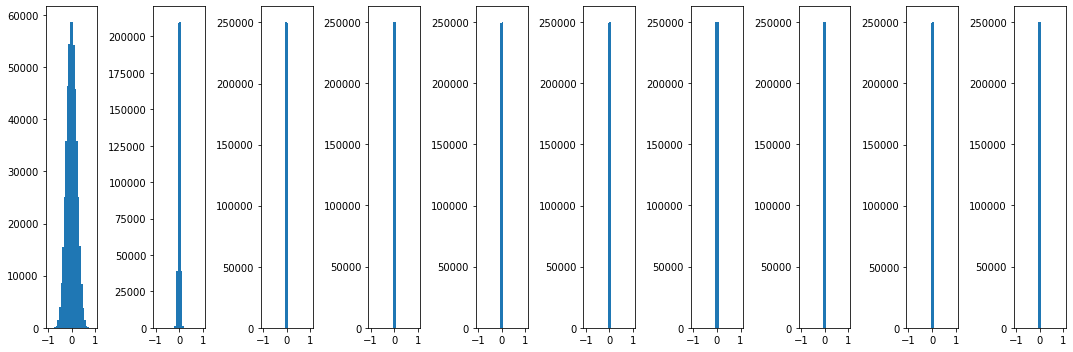

In [6]:
func = lambda x, y: np.random.randn(x, y) * 0.01
init_weight_plot(func, 'tanh')

**What happened?** <font color=maroon>Weights in the last layer are all 0 and we cannot make any useful prediction.</font> 

**Why did this happen?** Think about the backprop step. What do the gradients look like for one of the layers?

**Answer** Small weights will lead to small gradients (since the gradient is proportional to the value of the weights). This greatly diminshes the 'gradient signal' flowing backward through the network, and makes it hard to have clear predictions.

**What if we just increase the weights?**

input layer had mean 0.000274 and std 0.998668
hidden layer 1 had mean 0.001278 and std 0.981879
hidden layer 2 had mean 0.000298 and std 0.981620
hidden layer 3 had mean -0.000224 and std 0.981528
hidden layer 4 had mean 0.002025 and std 0.981903
hidden layer 5 had mean -0.001691 and std 0.981682
hidden layer 6 had mean -0.001674 and std 0.981590
hidden layer 7 had mean -0.000714 and std 0.981686
hidden layer 8 had mean 0.000012 and std 0.981692
hidden layer 9 had mean 0.000417 and std 0.981650
hidden layer 10 had mean -0.000490 and std 0.981666


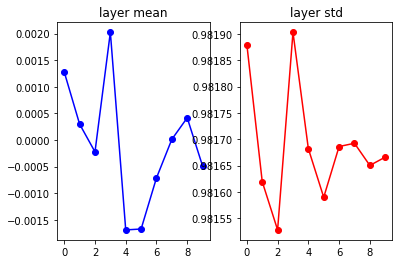

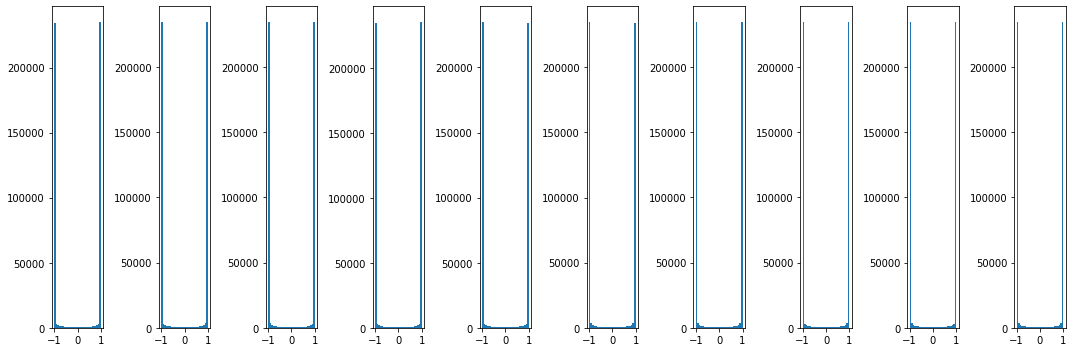

In [23]:
func = lambda x, y: np.random.randn(x, y) * 1.0
init_weight_plot(func, 'tanh')

This makes the neurons become saturated from the start, simply propagating -1 or 1 through the network layers.

## Option 2: Xavier Initialization <a href="http://proceedings.mlr.press/v9/glorot10a.html">[Glorot et al., 2010]</a>

Xavier Glorot and Yoshua Bengio showed that, in the case of linear activations, the distribution of the outputs in a neuron with randomly initialized weights has a variance that grows with the number of inputs. The higher the number of inputs, the higher the variance. They thus suggest normalizing the variance of each neuron's output to 1 by scaling its weight vector by the square root of its fan-in (i.e., its number of inputs), as follows. 

input layer had mean 0.002255 and std 0.998821
hidden layer 1 had mean 0.000038 and std 0.628384
hidden layer 2 had mean -0.000413 and std 0.486751
hidden layer 3 had mean 0.000240 and std 0.409162
hidden layer 4 had mean -0.000128 and std 0.359061
hidden layer 5 had mean 0.000030 and std 0.323086
hidden layer 6 had mean -0.000918 and std 0.295108
hidden layer 7 had mean 0.000002 and std 0.272462
hidden layer 8 had mean 0.000255 and std 0.254397
hidden layer 9 had mean -0.000168 and std 0.238569
hidden layer 10 had mean -0.000326 and std 0.225643


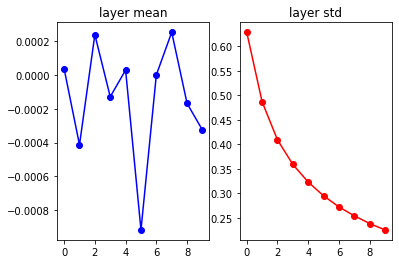

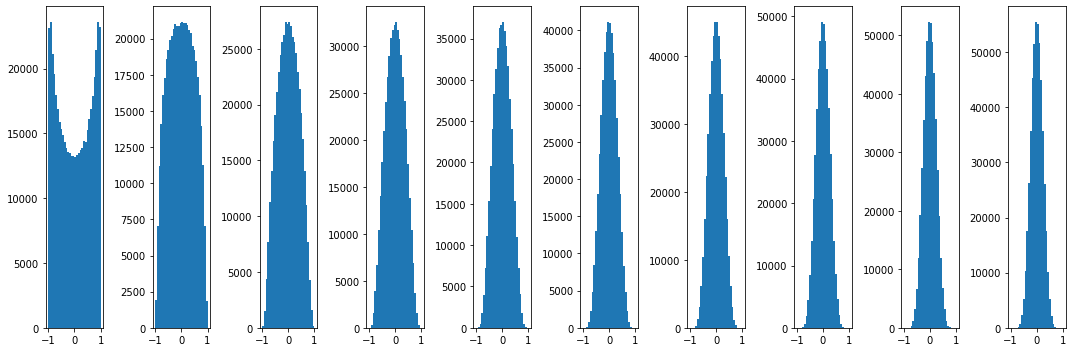

In [24]:
func = lambda x, y: np.random.randn(x, y) / np.sqrt(x)
init_weight_plot(func, 'tanh')

**Why does it work?** Consider the dot product between the weight and input vector, $w^Tx$, which is the input to the non-linear activation function. For the case of simplicity, we'll ignore the bias term. Let us then examine the variance of the ouput values.

$
\begin{align}
Var(w^Tx) &= Var(\sum_i^n w_ix_i)\\
          &= \sum_i^n Var(w_ix_i)\\
          &= \sum_i^n [E(w_i)]^2 Var(x_i) + [E(x_i)]^2 Var(w_i) + Var(x_i)Var(w_i)\\
          &= \sum_i^n Var(x_i)Var(w_i)\\
          &= (nVar(w))Var(x)
\end{align}
$

The first 3 steps in the derivation are due to the properties of variance, while the 4th assumes that both the data and weights are mean centered (*note that will not be the case with outputs from ReLU activations*). The final step assumes an identical distribution of the $x_i$ and $w_i$ values.

If we wish to prevent exploding or vanishing gradients, we should strive for the variance of the activation inputs to be similar to the variance of the layer inputs. The consequence of the derivation above is that, if we want to maintain the variance of the inputs after the dot-product operation, the weights $w$ should be scaled in such a way that the $Var(w) = 1/n$, where $n$ is the number of inputs for the layer. Given that, for any scalar $a$ and random variable $X$, $Var(aX)=a^2Var(X)$, this implies that the initial weights should be unit Gaussian normal values scaled by $\sqrt{1/n}$, leading to weight vectors with variance $1/n$, just as we do in the Xavier Initialization.

## Xavier Initialization and ReLU activations

Unlike tanh gates, the output of the ReLU (and other activations) is non-negative, leading to non-zero positive mean, which breaks the assumptions above. And, as we will see, Xavier Initialization does not seem to work with ReLU nonlinearity.

input layer had mean -0.000142 and std 0.998353
hidden layer 1 had mean 0.396738 and std 0.582589
hidden layer 2 had mean 0.281817 and std 0.414219
hidden layer 3 had mean 0.194787 and std 0.290845
hidden layer 4 had mean 0.145027 and std 0.214651
hidden layer 5 had mean 0.091360 and std 0.139883
hidden layer 6 had mean 0.065713 and std 0.099673
hidden layer 7 had mean 0.047564 and std 0.070009
hidden layer 8 had mean 0.036046 and std 0.050685
hidden layer 9 had mean 0.024966 and std 0.036483
hidden layer 10 had mean 0.017386 and std 0.027308


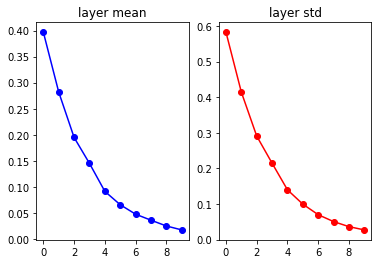

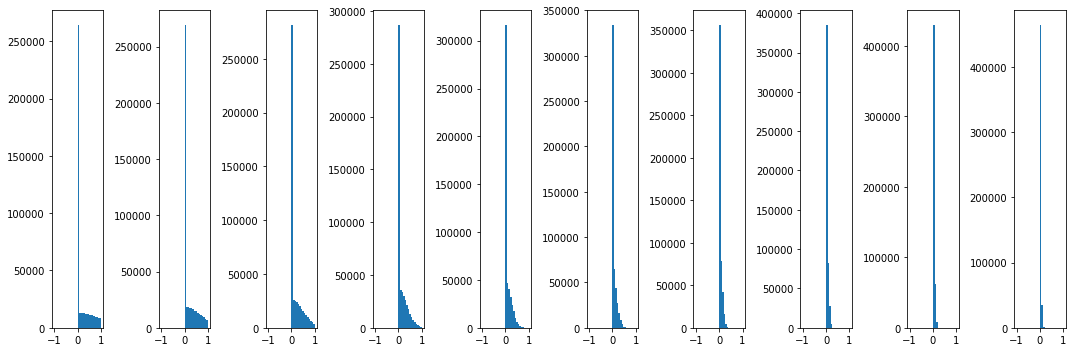

In [25]:
func = lambda x, y: np.random.randn(x, y) / np.sqrt(x)
init_weight_plot(func, 'relu')

## He Initialization for ReLU activations <a href="https://arxiv.org/abs/1502.01852">[He et al., 2015]</a>

He et al. suggest that the variance of the neurons should be $2/n$ for ReLU activated nodes, rather than $1/n$, leading to initial weights drawn from a unit Gaussian normal and scaled by $\sqrt{n/2}$.

input layer had mean -0.001693 and std 0.997992
hidden layer 1 had mean 0.562888 and std 0.825494
hidden layer 2 had mean 0.551858 and std 0.809546
hidden layer 3 had mean 0.548540 and std 0.798449
hidden layer 4 had mean 0.544674 and std 0.792153
hidden layer 5 had mean 0.514908 and std 0.760196
hidden layer 6 had mean 0.509503 and std 0.748830
hidden layer 7 had mean 0.462102 and std 0.722201
hidden layer 8 had mean 0.464736 and std 0.690762
hidden layer 9 had mean 0.472368 and std 0.690033
hidden layer 10 had mean 0.417227 and std 0.670010


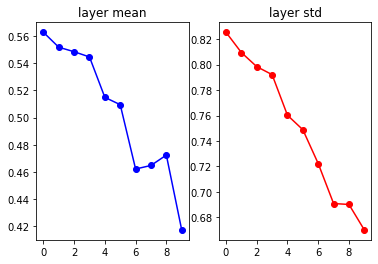

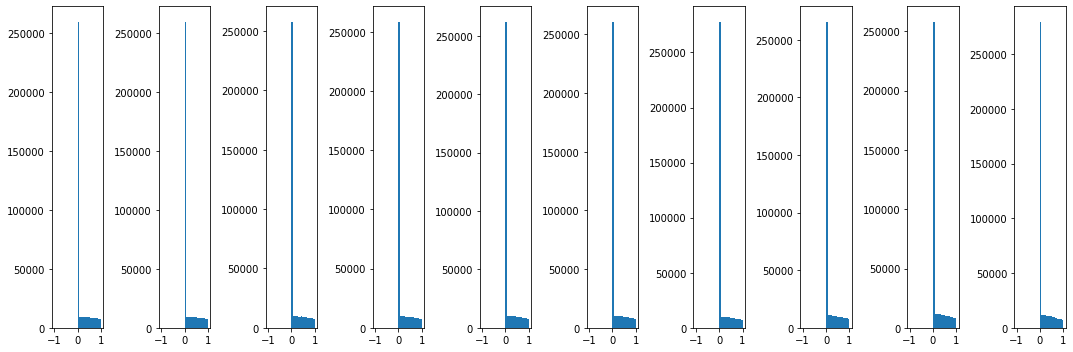

In [26]:
# note the sqrt(x/2) instead of sqrt(x)
func = lambda x, y: np.random.randn(x, y) / np.sqrt(x/2)
init_weight_plot(func, 'relu')